# Identifying Digital Currency Fraudulent Transactions - Data Exploration 

**University of San Diego, M.S. Applied Data Science**

Lai Leng Chan, Minsu Kim, Christopher Garcia

## Part 1: Importing libraries

In [1]:
%matplotlib inline

# Importing all packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# For Decision Trees
import statsmodels.tools.tools as stattools 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# For Regression model
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# For Partitioning the data
from sklearn.model_selection import train_test_split
import random

# For Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# For Random Forest
from sklearn.ensemble import RandomForestClassifier

## Part 2: Data Importing and Quick Views on Data

In [2]:
# To load the data
df = pd.read_csv("D:/ADS 599 Capstone Project/transaction_dataset.csv")
df.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


Here is a description of the rows of the dataset:

- Index: the index number of a row

- Address: the address of the ethereum account

- FLAG: whether the transaction is fraud or not

- Avg min between sent tnx: Average time between sent transactions for account in minutes

- Avg_min_between_received_tnx: Average time between received transactions for account in minutes

- Time_Diff_between_first_and_last(Mins): Time difference between the first and last transaction

- Sent_tnx: Total number of sent normal transactions

- Received_tnx: Total number of received normal transactions

- Number_of_Created_Contracts: Total Number of created contract transactions

- Unique_Received_From_Addresses: Total Unique addresses from which account received transactions

- Unique_Sent_To_Addresses20: Total Unique addresses from which account sent transactions

- Min_Value_Received: Minimum value in Ether ever received

- Max_Value_Received: Maximum value in Ether ever received

- Avg_Value_Received: Average value in Ether ever received

- Min_Val_Sent: Minimum value of Ether ever sent

- Max_Val_Sent: Maximum value of Ether ever sent

- Avg_Val_Sent: Average value of Ether ever sent

- Min_Value_Sent_To_Contract: Minimum value of Ether sent to a contract

- Max_Value_Sent_To_Contract: Maximum value of Ether sent to a contract

- Avg_Value_Sent_To_Contract: Average value of Ether sent to contracts

- Total_Transactions(Including_Tnx_to_Create_Contract): Total number of transactions

- Total_Ether_Sent:Total Ether sent for account address

- Total_Ether_Received: Total Ether received for account address

- Total_Ether_Sent_Contracts: Total Ether sent to Contract addresses

- Total_Ether_Balance: Total Ether Balance following enacted transactions

- Total_ERC20_Tnxs: Total number of ERC20 token transfer transactions

- ERC20_Total_Ether_Received: Total ERC20 token received transactions in Ether

- ERC20_Total_Ether_Sent: Total ERC20token sent transactions in Ether

- ERC20_Total_Ether_Sent_Contract: Total ERC20 token transfer to other contracts in Ether

- ERC20_Uniq_Sent_Addr: Number of ERC20 token transactions sent to Unique account addresses

- ERC20_Uniq_Rec_Addr: Number of ERC20 token transactions received from Unique addresses

- ERC20_Uniq_Rec_Contract_Addr: Number of ERC20token transactions received from Unique contract addresses

- ERC20_Avg_Time_Between_Sent_Tnx: Average time between ERC20 token sent transactions in minutes

- ERC20_Avg_Time_Between_Rec_Tnx: Average time between ERC20 token received transactions in minutes

- ERC20_Avg_Time_Between_Contract_Tnx: Average time ERC20 token between sent token transactions

- ERC20_Min_Val_Rec: Minimum value in Ether received from ERC20 token transactions for account

- ERC20_Max_Val_Rec: Maximum value in Ether received from ERC20 token transactions for account

- ERC20_Avg_Val_Rec: Average value in Ether received from ERC20 token transactions for account

- ERC20_Min_Val_Sent: Minimum value in Ether sent from ERC20 token transactions for account

- ERC20_Max_Val_Sent: Maximum value in Ether sent from ERC20 token transactions for account

- ERC20_Avg_Val_Sent: Average value in Ether sent from ERC20 token transactions for account

- ERC20_Uniq_Sent_Token_Name: Number of Unique ERC20 tokens transferred

- ERC20_Uniq_Rec_Token_Name: Number of Unique ERC20 tokens received

- ERC20_Most_Sent_Token_Type: Most sent token for account via ERC20 transaction

- ERC20_Most_Rec_Token_Type: Most received token for account via ERC20 transactions

In [3]:
# Dataframe Dimension
df.shape

(9841, 51)

In [4]:
# Checking the data type for each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

## Part 3: Exploratory Data Analysis

### Converting selected variables to categorical variable:

In [101]:
# Convert the target variable 'FLAG' to a categorical variable
df['FLAG'] = df['FLAG'].astype('category')

# Convert the most received token variable ' ERC20_most_rec_token_type' to a categorical variable
df[' ERC20_most_rec_token_type'] = df[' ERC20_most_rec_token_type'].astype('category')

# Convert the most sent token variable ' ERC20_most_sent_token_type' to a categorical variable
df[' ERC20 most sent token type'] = df[' ERC20 most sent token type'].astype('category')

### Univariate Non-Graphical Analysis: 

In [6]:
# Filtering out columns that gives average value
average_columns = df.loc[:, ['Avg min between sent tnx','Avg min between received tnx','avg val received',
                             'avg val sent','avg value sent to contract']]

# Descriptive statistics on selected columns
average_columns.describe()

,Avg min between sent tnx,Avg min between received tnx,avg val received,avg val sent,avg value sent to contract
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000
mean,5086.878721,8004.851184,100.711721,44.755731,0.000005
std,21486.549974,23081.714801,2885.002236,239.080215,0.000323
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.426905,0.086184,0.000000
50%,17.340000,509.770000,1.729730,1.606000,0.000000
75%,565.470000,5480.390000,22.000000,21.999380,0.000000
max,430287.670000,482175.490000,283618.831600,12000.000000,0.023014


In [7]:
# Filtering out columns that gives maximum value
maximum_columns = df.loc[:, ['max value received ','max val sent','max val sent to contract']]

# Descriptive statistics on selected columns
maximum_columns.describe()

,max value received,max val sent,max val sent to contract
count,9841.000000,9841.000000,9841.000000
mean,523.152481,314.617297,0.000008
std,13008.821539,6629.212643,0.000516
min,0.000000,0.000000,0.000000
25%,1.000000,0.164577,0.000000
50%,6.000000,4.999380,0.000000
75%,67.067040,61.520653,0.000000
max,800000.000000,520000.000000,0.046029


In [8]:
# Filtering out columns that gives minimum value
minimum_columns = df.loc[:, ['min value received','min val sent','min value sent to contract']]

# Descriptive statistics on selected columns
minimum_columns.describe()

,min value received,min val sent,min value sent to contract
count,9841.000000,9841.000000,9841.000000
mean,43.845153,4.800090,0.000003
std,325.929139,138.609682,0.000225
min,0.000000,0.000000,0.000000
25%,0.001000,0.000000,0.000000
50%,0.095856,0.049126,0.000000
75%,2.000000,0.998800,0.000000
max,10000.000000,12000.000000,0.020000


In [9]:
# Drop multiple columns
df_filtered = df.drop(average_columns + maximum_columns + minimum_columns, axis=1)

# Descriptive statistics on the selected columns
df_filtered.describe()

,Unnamed: 0,Index,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,total transactions (including tnx to create contract,total Ether sent,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,4920.000000,1815.049893,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,283.362362,1.016092e+04,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,2840.996333,1222.621830,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,1352.404013,3.583227e+05,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,2460.000000,821.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,4.000000,2.262059e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,4920.000000,1641.000000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,8.000000,1.248680e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,7380.000000,2601.000000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,54.000000,1.009990e+02,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,9840.000000,4729.000000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,19995.000000,2.858096e+07,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


### Univariate Graphical Analysis: 

We want to investigate the class imbalance of the target variable - FLAG. Class imbalance is where the number of instances of one class far exceeds the other which lead to a bias towards the majority class. 

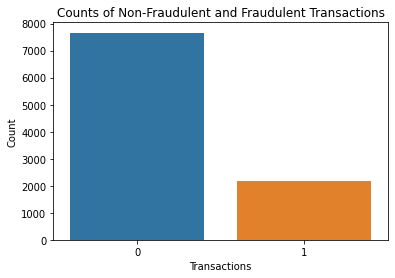

In [10]:
# Bar graph on the target variable - FLAG
sns.countplot(x='FLAG', data=df)
plt.xlabel('Transactions')
plt.ylabel('Count')
plt.title('Counts of Non-Fraudulent and Fraudulent Transactions')
plt.show()

In [11]:
# Inspect the target distribution
df['FLAG'].value_counts()

FLAG
0    7662
1    2179
Name: count, dtype: int64

The transactions that are found out to be fraudulent is roughly 22 percent, which means the dataset has an imbalance
ratio of 80:20 and is considered highly imbalanced. Thus, the dataset might require further balance techniques such as oversampling or undersampling.

### Multivariate Non-Graphical Analysis: (Minsu)

### Multivariate Graphical Analysis: (Minsu & Annie)

Using stacked up histograms, we can compare the distributions of most sent and most received tokens between fraud and non-fraud cases, allowing us to identify whether specific tokens are more prevalent in fraudulent transactions and gaining insights to enhance fraud detection and prevention strategies.

Note: In our analysis, we have chosen to filter out the tokens received/sent to be above 50 occurrences. By setting this threshold, we focus on tokens that appear frequently in transactions, allowing us to concentrate on the more prevalent and potentially significant tokens in our investigation of cryptocurrency fraud. This approach helps us gain deeper insights into patterns and trends associated with these commonly transacted tokens, enhancing our ability to detect and address potential fraudulent activities effectively.

In [82]:
# Most received tokens counts
rec_token_counts = df[' ERC20_most_rec_token_type'].value_counts()
rec_token_counts

 ERC20_most_rec_token_type
0                        4399
OmiseGO                   873
Blockwell say NOTSAFU     779
DATAcoin                  358
Livepeer Token            207
                         ... 
GECoin                      1
Fysical                     1
FundRequest                 1
Freyr Coin                  1
yocoinclassic               1
Name: count, Length: 466, dtype: int64

In [102]:
# Most sent tokens counts
sent_token_counts = df[' ERC20 most sent token type'].value_counts()
sent_token_counts

 ERC20 most sent token type
0                4399
                 1191
EOS               138
OmiseGO           137
Golem             130
                 ... 
Nebulas             1
Nexium              1
CultureVirtue       1
Not                 1
LEADCOIN            1
Name: count, Length: 304, dtype: int64

In [84]:
# Group data by the target variable 'FLAG' and the count occurences of received tokens
rec_grouped_data = df.groupby(['FLAG', ' ERC20_most_rec_token_type']).size().unstack()

# Filter categories with more than 50 counts
rec_filtered_categories = rec_grouped_data.columns[rec_grouped_data.sum() > 50]

# Filter data based on the selected categories
rec_filtered_data = rec_grouped_data[rec_filtered_categories]

In [103]:
# Group data by the target variable 'FLAG' and the count occurences of sent tokens
sent_grouped_data = df.groupby(['FLAG', ' ERC20 most sent token type']).size().unstack()

# Filter categories with more than 50 counts
sent_filtered_categories = sent_grouped_data.columns[sent_grouped_data.sum() > 50]

# Filter data based on the selected categories
sent_filtered_data = sent_grouped_data[sent_filtered_categories]

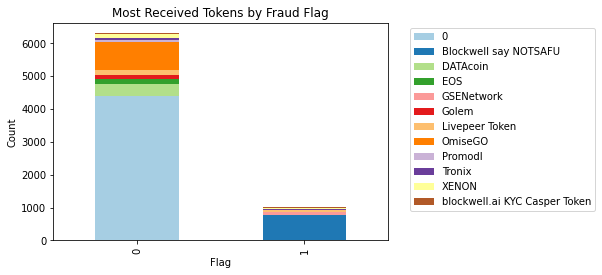

In [95]:
# Stacked histogram on 'FLAG' and the count occurences of received tokens
rec_stacked_plot = rec_filtered_data.plot(kind='bar', stacked=True, colormap='Paired')

plt.xlabel('Flag')
plt.ylabel('Count')
plt.title('Most Received Tokens by Fraud Flag')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

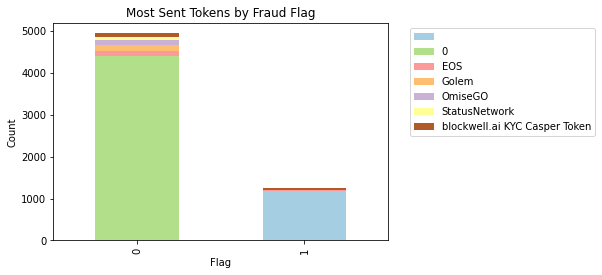

In [104]:
# Stacked histogram on 'FLAG' and the count occurences of sent tokens
sent_stacked_plot = sent_filtered_data.plot(kind='bar', stacked=True, colormap='Paired')

plt.xlabel('Flag')
plt.ylabel('Count')
plt.title('Most Sent Tokens by Fraud Flag')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Part 4: Data Preparation & Cleaning (Chris)

### Checking for missing variables:

In [12]:
# Checking for missing values
df.isna().sum()

Unnamed: 0                                                 0
Index                                                      0
Address                                                    0
FLAG                                                       0
Avg min between sent tnx                                   0
Avg min between received tnx                               0
Time Diff between first and last (Mins)                    0
Sent tnx                                                   0
Received Tnx                                               0
Number of Created Contracts                                0
Unique Received From Addresses                             0
Unique Sent To Addresses                                   0
min value received                                         0
max value received                                         0
avg val received                                           0
min val sent                                               0
max val sent            

In [ ]:
# Code here if we need to do anything with missing values (Chris)

### Dropping meaningless columns:

In [6]:
# Drop first two columns (Index, Adress)
df = df.iloc[:,2:]
df.head()

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


### Splitting the dataset to training set and test set:

### Balancing the target variable (FLAG) in the training set: